

# DSI - 16 Capstone Project -  Personality Prediction 

## **Part 2 - Multiclass Modelling**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-2---Multiclass-Modelling" data-toc-modified-id="Part-2---Multiclass-Modelling-1"><strong>Part 2 - Multiclass Modelling</strong></a></span></li><li><span><a href="#Notebook-Organization" data-toc-modified-id="Notebook-Organization-2">Notebook Organization</a></span><ul class="toc-item"><li><span><a href="#Modelling-with-Hyperparameter-tuning-and-Vectorizers" data-toc-modified-id="Modelling-with-Hyperparameter-tuning-and-Vectorizers-2.1">Modelling with Hyperparameter tuning and Vectorizers</a></span></li><li><span><a href="#Resampling-with-SMOTE-and-SMOTETomek-to-tackle-imbalanced-classes" data-toc-modified-id="Resampling-with-SMOTE-and-SMOTETomek-to-tackle-imbalanced-classes-2.2">Resampling with SMOTE and SMOTETomek to tackle imbalanced classes</a></span></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-2.3">Performance Metrics</a></span></li></ul></li><li><span><a href="#Reading-in-the-cleaned-data" data-toc-modified-id="Reading-in-the-cleaned-data-3">Reading in the cleaned data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4">Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.1">Train Test Split</a></span></li><li><span><a href="#Term-Frequency-Inverse-Document-Frequency-(TF-IDF)-Vectorizer-using-SpaCy" data-toc-modified-id="Term-Frequency-Inverse-Document-Frequency-(TF-IDF)-Vectorizer-using-SpaCy-4.2">Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer using SpaCy</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5">Modelling</a></span><ul class="toc-item"><li><span><a href="#User-Defined-Functions" data-toc-modified-id="User-Defined-Functions-5.1">User Defined Functions</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-5.2">Baseline Model</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.3">Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-5.4">Naive Bayes</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.5">Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.6">XGBoost</a></span></li><li><span><a href="#Summary-of-Model-Performance" data-toc-modified-id="Summary-of-Model-Performance-5.7">Summary of Model Performance</a></span></li></ul></li></ul></div>

## Notebook Organization

This project is organized into 3 different notebooks with the following parts

- Part 1: [Loading in the dataset, EDA and data-preprocessing](Capstone_Personality_Prediction_EDA_SpaCy_.ipynb)
- **Part 2: Multi Class Modelling (16 Classes for the personality type)**
- Part 3: [Binary Class Modelling (4 Binary Classification based on each I-E, N-S, T-F, J-P axes)](Capstone_Personality_Prediction_Binary_Modelling.ipynb)

In this notebook, we create a multiclass classifier for the 16 personlity types.

### Modelling with Hyperparameter tuning and Vectorizers

We will use ```TfidfVectorizer()``` to transform the data before fitting into the following models:

1. Logistic Regression
2. Naive Bayes
3. Random Forest
4. XGBoost

The models will be run with **hyperparameters tuning** for the various model using GridSearch on 5-folds Cross Validation


### Resampling with SMOTE and SMOTETomek to tackle imbalanced classes

As we have seen, the dataset we are working with has a highly uneven distribution of classes. When it comes to classification, it is important to train our model with a balanced dataset so that our model does not become biased towards predicting a particular class.

Oversampling and undersampling are two ways in which we can adjust the distribution of classes. 

For this project I have used SMOTETomek to perform over-sampling using SMOTE and cleaning using Tomek links. Then combine over- and under-sampling using SMOTE and Tomek links to create a more balanced dataset

---

Each model was ran via a Pipeline and GridSearch set-up to perform a 5 fold cross validation process. 
The pipeline consisted of 2 steps:

1. Resampling both classes via SMOTETomek

2. Classification via the selected model

GridSearch was used to find the optimal hyperparameters out of the range of values passed, with the expectation that it would lead to better model performance compared to using the default hyperparameter values.


### Performance Metrics

As this is a multiclass model, we will see how the model performed based on:

**1) F1-Score**
   - The F1 score can be interpreted as a weighted average of the precision and recall values, where an 
   - F1 score reaches its best value at 1 and worst value at 0.
    
**2) Matthews Correlation Coefficient (MCC)** 
   - What is the correlation coefficient between the observed and predicted classification --  
   - the  higher the score indicates that the model was able to correctly predict the majority of various data instances
   

In [1]:
import pandas as pd
pd.set_option('max_columns', 500) 
pd.set_option('max_rows', 500) 
pd.set_option('display.max_colwidth', 300)
pd.options.display.float_format = "{:,.3f}".format

import numpy as np

# Visualization Imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# sns.set_style("whitegrid")

#API imports
import requests
import time
import random

from collections import Counter
from bs4 import BeautifulSoup

#Regex
import regex as re

#nlp
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams


# Using SpaCy
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Gensim

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.doc2vec import TaggedDocument

#word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import utils

#Modelling
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


#Imbalance Data and Ensemble Models
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

#==== Classification matrix
from sklearn.metrics import f1_score, classification_report, accuracy_score, matthews_corrcoef, roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, RocCurveDisplay




## Reading in the cleaned data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/My Drive/Data Science/GA DSI/Working files/DSI Working/Project1234/Project-capstone project/datasets/mbti_cleaned.csv')
df = pd.read_csv('data/mbti_cleaned.csv')

In [4]:
df.shape

(8675, 14)

This dataset contains 8675 rows of data, on each row is a person’s:

- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

In [5]:
df.head(10)

,Unnamed: 0,type,posts,num_posts,words_per_comment,nouns_per_commment,verbs_per_comment,adj_per_comment,interject_per_comment,cleaned_str,ie,ns,tf,jp
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-chan...,50,16.060,2.620,1.520,1.100,0.140,urlstr moments urlstr sportscenter top ten plays urlstr pranks life changing experience life urlstr urlstr repeat today may perc experience immerse last thing friend posted facebook committing suicide next day rest peace urlstr enfj7 sorry hear distress natural relationship perfection time every...,I,N,F,J
1,1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|...,50,26.820,3.520,3.620,1.760,0.200,finding lack posts alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello grin takes converse flirting acknowledge presence return words smooth wordplay cheeky grins lack balance hand eye coordinat...,E,N,T,P
2,2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I ...",50,18.660,3.000,2.540,1.580,0.240,good one urlstr course say know blessing curse absolutely positive best friend could amazing couple count yes could madly love case reconciled feelings thank link called ti si loop stem current topic obsession deadly like stuck thoughts mind wanders circles feels truly terrible noticed peculiar ...,I,N,T,P
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existe...",50,23.520,3.420,3.020,1.720,0.180,dear enjoyed conversation day esoteric gabbing nature universe idea every rule social code arbitrary constructs created dear sub long time see sincerely alpha none types hurt deep existential ways want part probably sliding scale depends individual preferences like everything humanity draco malf...,I,N,T,J
4,4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His ...,50,21.880,3.480,2.740,1.800,0.200,fired another silly misconception approaching logically going key unlocking whatever think entitled nobody wants approached bs guys really wants go super duper long ass vacation c mon guys boss listen get even approached logically everything never mind go permanent vacation two months crazy idea...,E,N,T,J
5,5,INTJ,"'18/37 @.@|||Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi...",50,31.700,4.460,4.700,2.080,0.140,18 37 science perfect scientist claims scientific information revised discover new things rational thinking useful society edgar allen poe siggy people see obvious fi quick put agree ne see compare haku definite flat naruto lets get party started 66314 say disproved 

In [6]:
df.drop(columns='Unnamed: 0', inplace=True)


In [7]:
df.columns

Index(['type', 'posts', 'num_posts', 'words_per_comment', 'nouns_per_commment',
       'verbs_per_comment', 'adj_per_comment', 'interject_per_comment',
       'cleaned_str', 'ie', 'ns', 'tf', 'jp'],
      dtype='object')

## Data Preprocessing

### Train Test Split

In [8]:
X = df['cleaned_str']
y = df['type']

In [9]:
#Train test split with stratify
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42, stratify=y, test_size=0.33)

In [10]:
type(X_train)

pandas.core.series.Series

In [11]:
X_train.shape

(5812,)

In [12]:
X_val.shape

(2863,)

### Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer using SpaCy

TF-IDF is a score that tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.



In [74]:
# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
spacy_stop_words = spacy.lang.en.stop_words.STOP_WORDS

#Create list of stop words on Personality types
type_stopword = [x.lower() for x in df['type'].unique()]
type_stopwords = type_stopword + [x + 's' for x in type_stopword]

# Create our list of punctuation marks
punctuations = string.punctuation

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if \
                word not in spacy_stop_words and \
                word not in type_stopwords and \
                word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [75]:
#Finding the total unique words in the whole corpus

tvectotal = TfidfVectorizer(tokenizer=spacy_tokenizer, max_df=0.3).fit(X_train)
len(tvectotal.get_feature_names())

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


71502

The vocabulary size of the unique words is 71502. We are limiting it to 10k top features.

In [14]:
#tried with max_features: 5000, 10000, 3000, best is 10k features
tvec = TfidfVectorizer(tokenizer=spacy_tokenizer, max_features=10000, max_df=0.3)

#transforming X_train and X test
X_train_tvec = tvec.fit_transform(X_train)
X_val_tvec = tvec.transform(X_val)


In [15]:
X_train_tvec.shape

(5812, 10000)

In [16]:
X_val_tvec.shape

(2863, 10000)

## Modelling

### User Defined Functions

In [18]:
def classifiermodel(X_train, y_train, X_test, y_test, model, gs=False, param=False, title=None, label=None):
    
    """"
    Function to fit and display scores of the model, the confusion matrix and AUC ROC
    
    Take in Arguements:
     - X_train, y_train, X_test, y_test - the train test split data
     - model - the type of model to fit data
     - gs - if the model parsed in is a grid search
     - param - If need to print best parameters for pipe steps
     - labels - list that model is classification
     
     Returns the dataframe of the predicted values and actual values
    """    
    model.fit(X_train, y_train)
    trgscore = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    valscore = model.score(X_test, y_test)
    
    #getting the probabilities of test data
    
    if gs:
        best_model = model.best_estimator_
        best_score = model.best_score_
        best_params =  model.best_params_
    else:
        best_model = model
        best_score = trgscore
        best_params = model.get_params()
        
    proba = model.predict_proba(X_test)
    proba = proba[:, 1]

    print(f'======== {title} =================\n')
    
    if param:
        print('Best parameters  : ', best_params)
        print()
    print('Best CV  score   : ', best_score)
    print('Training score   :', trgscore)
    print('Validation score :', valscore)
    print('Accuracy         :', accuracy_score(y_pred, y_test))
    print('MCC Score        :', matthews_corrcoef(y_pred, y_test))
    print()
    print(classification_report(y_test, y_pred, target_names=label))
        
    return y_pred, proba

In [59]:
def model_metrics(true, pred, prob, cm=False, show_df=False, title = 'Model_Metrics'):
    """
    Function that calculates and returns a dataframe with classification metrics.
    Input
    true: true values of target variable
    pred: predicted values of target variable
    prob: probability of positive class 
    cm: confusion matrix will be plot if == True
    show_df: dataframe with metrics will be displayed if == True
    title: the column name for the dataframe that is displayed/returned
    labels: the negative and positive class labels 
    
    Output
    df: dataframe with classification metrics
    
    """        
        
    df = pd.DataFrame(data = [accuracy_score(pred, true),
                              1- accuracy_score(pred, true),
                              f1_score(true, pred, average='macro'),
                              f1_score(true, pred, average='weighted'),
                              matthews_corrcoef(true, pred)],
                         index = ['Accuracy',
                                  'Misclassification Rate',
                                  'F1-Score Macro',
                                  'F1-Score Weighted',
                                  'Matthews Correlation'],
                        columns = [title])
    if show_df:
        display(df)
    return(df)

In [19]:
def plot_impt_features(features_df, title, top_feat=20):
    
    """
    Function that plots the important features_df.
    
    Takes in arguements:
    features _df: the list of features that had the coefficient 
    title: the title of the graph
    top_feat: the number of top features to plot
    
    Output
    Plots the graph of important features
    
    """   
    plt.figure(figsize=(12,6))
    sns.barplot(x = features_df['feature_importance'][:top_feat], y = features_df['feature'][:top_feat], color='b')
    plt.title(title, fontsize=18)
    plt.xlabel('Feature importance', fontsize=14)
    plt.xticks(size=13)
    plt.ylabel(None)
    plt.yticks(size=13);

In [54]:
def show_most_informative_features(vectorizer, clf, n=20):
    
    """
    Function that shows the n most informative features.
    
    Takes in arguements:
    vectorizer: vectorize in which we get our word volcabulary
    clf: the mdel which the vector is being fed into
    n: the number of +ve and -ve coeff to plot
    
    Output
    Dataframe of positive and negative coeff
    
    """   
    
    
    feature_names = vectorizer.get_feature_names()
    
    #link the feature names with the coef_[0] -> the top coeff for positive class
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    
    top_pos = coefs_with_fns[:-(n + 1):-1]
    top_neg = coefs_with_fns[:n]
    
    #top = list(zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1]))
    
    #print('top_pos: ', top_pos[0])
    #print('top_neg: ', top_neg[0])
    
    show_posfeat = pd.DataFrame(top_pos, columns=['positive_coeff', 'pos_feature'])
    show_negfeat = pd.DataFrame(top_neg, columns=['negative_coeff', 'neg_feature'])
    show_feat = show_posfeat.join(show_negfeat)
    
    display(show_feat)

    
    #for (coef_1, fn_1), (coef_2, fn_2) in top:
    #    print (f"{coef_1:.4f}\t{fn_1}\t\t{coef_2:.4f}\t{fn_2}") 
    

In [21]:
#Global Variables for Gridsearch
cv = 5
n_jobs = -1

### Baseline Model

In [17]:
df['type'].value_counts(normalize=True)

INFP   0.211
INFJ   0.169
INTP   0.150
INTJ   0.126
ENTP   0.079
ENFP   0.078
ISTP   0.039
ISFP   0.031
ENTJ   0.027
ISTJ   0.024
ENFJ   0.022
ISFJ   0.019
ESTP   0.010
ESFP   0.006
ESFJ   0.005
ESTJ   0.004
Name: type, dtype: float64

Based on Majority Class Baseline, baseline model is **0.211**

### Logistic Regression


In [22]:
lr_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('lr', LogisticRegression(random_state = 42, max_iter=1000))])

lr_param_grid = {'lr__solver': ['liblinear'],
                 'lr__C':[1.0], #, 0.1]
                 'lr__penalty':['l1']}
    
lr_gs = GridSearchCV(lr_pipe, param_grid=lr_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [23]:
lr_pred, lr_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val,
                                    model=lr_gs, gs=True, param=True,
                                    title='LogisticRegression +  TF-IDF', label=type_stopword)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


======== LogisticRegression +  TF-IDF =================

Best parameters  :  {'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.33706095725488866
Training score   : 0.643840330350998
Validation score : 0.35103038770520434
Accuracy         : 0.35103038770520434
MCC Score        : 0.2709083104972687

              precision    recall  f1-score   support

        infj       0.18      0.27      0.21        63
        entp       0.33      0.39      0.36       223
        intp       0.11      0.17      0.14        76
        intj       0.28      0.31      0.29       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.04      0.08      0.06        13
        enfp       0.04      0.07      0.05        29
        isfp       0.48      0.35      0.41       485
        istp       0.55      0.41      0.47       605
        isfj       0.38      0.37      0.37       360
        istj    

In [61]:
lr_m = model_metrics(y_val, lr_pred, lr_proba, cm=False, show_df=False, title = 'Logistic Reg')

In [55]:
show_most_informative_features(tvec, lr_gs.best_estimator_.steps[1][1], n=20)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,36.880,eggsies,-16.470,te
1,19.374,construction,-13.004,literally
2,17.855,jk,-12.853,perfectly
3,17.694,jawz,-11.078,weak
4,16.036,fe,-9.957,irritate
5,14.595,manipulation,-9.744,couple
6,14.494,pollution,-7.341,outside
7,14.387,lethargic,-6.896,op
8,14.093,hopeless,-6.667,funny
9,13.809,5s,-5.912,female


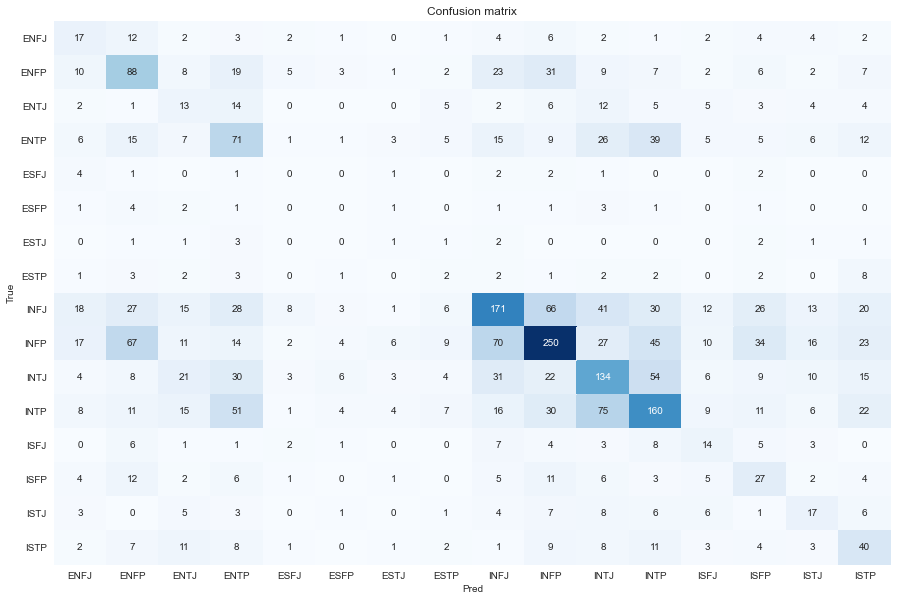

In [26]:
## Plot confusion matrix
classes = np.unique(y_val)
y_val_array = pd.get_dummies(y_val, drop_first=False).values

cm = confusion_matrix(y_val, lr_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show();


### Naive Bayes 

In [27]:
nb_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('nb' , MultinomialNB())])

nb_param_grid = {}
    
nb_gs = GridSearchCV(nb_pipe, param_grid=nb_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [28]:
nb_pred, nb_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, 
                            model=nb_gs, gs=True, param=False,
                            title='Naive Bayes +  TF-IDF', label=type_stopword)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


======== Naive Bayes +  TF-IDF =================

Best CV  score   :  0.3623562423135608
Training score   : 0.7897453544390916
Validation score : 0.3485853999301432
Accuracy         : 0.3485853999301432
MCC Score        : 0.258228676498026

              precision    recall  f1-score   support

        infj       0.13      0.24      0.17        63
        entp       0.29      0.41      0.34       223
        intp       0.10      0.20      0.13        76
        intj       0.26      0.27      0.26       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.00      0.00      0.00        13
        enfp       0.29      0.07      0.11        29
        isfp       0.48      0.32      0.39       485
        istp       0.47      0.47      0.47       605
        isfj       0.30      0.33      0.32       360
        istj       0.42      0.39      0.41       430
        estp       0.21      0.20      0.20        55
  

In [64]:
nb_m = model_metrics(y_val, nb_pred, nb_proba, cm=False, show_df=False, title = 'Naive Bayes')

In [56]:
show_most_informative_features(tvec, nb_gs.best_estimator_.steps[1][1], n=20)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,-6.168,fe,-10.161,00
1,-6.219,haha,-10.161,00100000
2,-6.350,welcome,-10.161,01100101
3,-6.734,ni,-10.161,02
4,-6.794,xd,-10.161,03
5,-6.853,strong,-10.161,08
6,-6.915,hey,-10.161,101
7,-6.955,song,-10.161,10char
8,-6.971,date,-10.161,10th
9,-7.017,reply,-10.161,110


### Random Forest

In [32]:
#rf_pipe = Pipeline([('sm', SMOTE(random_state = 42)), 
#                        ('rf', RandomForestClassifier(random_state = 42, max_depth=5, min_samples_split=4, n_jobs=-2))],
#                        verbose=1)

rf_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('rf', RandomForestClassifier(random_state = 42))]) 

rf_param_grid = {
    'rf__n_estimators': [500], #400, best is 500
    'rf__max_depth': [7], #5, best is 7
    'rf__min_samples_split': [4] # default=2
    }
    
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [33]:
%%time
rf_pred, rf_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, 
                            model=rf_gs, gs=True, param=True,
                            title='Random Forest +  TF-IDF', label=type_stopword)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


======== Random Forest +  TF-IDF =================

Best parameters  :  {'rf__max_depth': 7, 'rf__min_samples_split': 4, 'rf__n_estimators': 500}

Best CV  score   :  0.2338222562279581
Training score   : 0.5543702684101858
Validation score : 0.22843171498428222
Accuracy         : 0.22843171498428222
MCC Score        : 0.09032624014092067

              precision    recall  f1-score   support

        infj       0.12      0.06      0.08        63
        entp       0.18      0.05      0.08       223
        intp       0.12      0.13      0.12        76
        intj       0.14      0.05      0.07       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.50      0.08      0.13        13
        enfp       0.08      0.10      0.09        29
        isfp       0.25      0.15      0.19       485
        istp       0.26      0.67      0.38       605
        isfj       0.21      0.08      0.12       360
        i

In [66]:
rf_m = model_metrics(y_val, rf_pred, rf_proba, cm=False, show_df=False, title = 'Random Forest')

In [67]:
rf_m

,Random Forest
Accuracy,0.228
Misclassification Rate,0.772
F1-Score Macro,0.126
F1-Score Weighted,0.185
Matthews Correlation,0.090


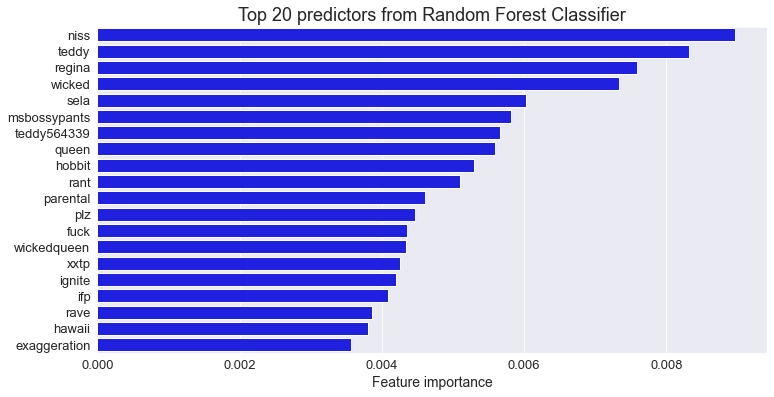

In [34]:
rf_feature_importance = rf_gs.best_estimator_.steps[1][1].feature_importances_

# put feature importance into a dataframe
rf_features_df = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': rf_feature_importance}).sort_values('feature_importance', ascending=False)



### XGBoost

In [35]:
xgb_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('xgb', XGBClassifier(random_state = 42))]) 
xgb_param_grid = {
    'xgb__eval_metric' : ['merror'], #
    'xgb__subsample' : [0.5], # Randomly sample 0.5 of the data to prevent overfitting
    'xgb__colsample_bytree' : [0.5], # Typical values range between 0.5-0.9
    'xgb__learning_rate' : [.01], # common to have small values in the range of 0.1 to 0.3, as well as values less than 0.1
    'xgb__n_estimators' : [100], #500
    'xgb__reg_alpha' : [0.01], # L1 regularization term on weight 
    'xgb__gamma' : [0.1], # Gamma specifies the minimum loss reduction required to make a split #.2
}
    
xgb_gs = GridSearchCV(xgb_pipe, param_grid=xgb_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [36]:
%%time
xgb_pred, xgb_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, 
                            model=xgb_gs, gs=True, param=True,
                            title='XGBoost +  TF-IDF', label=type_stopword)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 14.1min remaining: 21.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 14.2min finished


======== XGBoost +  TF-IDF =================

Best parameters  :  {'xgb__colsample_bytree': 0.5, 'xgb__eval_metric': 'merror', 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.01, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0.01, 'xgb__subsample': 0.5}

Best CV  score   :  0.282518946933786
Training score   : 0.4003785271851342
Validation score : 0.2808243101641635
Accuracy         : 0.2808243101641635
MCC Score        : 0.14830331518333656

              precision    recall  f1-score   support

        infj       0.32      0.14      0.20        63
        entp       0.33      0.12      0.18       223
        intp       0.16      0.08      0.11        76
        intj       0.25      0.13      0.17       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.20      0.08      0.11        13
        enfp       0.00      0.00      0.00        29
        isfp       0.33      0.24      0.28       485
        istp       

In [68]:
xgb_m = model_metrics(y_val, xgb_pred, xgb_proba, cm=False, show_df=False, title = 'XGBoost')

In [69]:
xgb_m

,XGBoost
Accuracy,0.281
Misclassification Rate,0.719
F1-Score Macro,0.156
F1-Score Weighted,0.242
Matthews Correlation,0.148


### Summary of Model Performance

In [70]:
lst_metrics = [lr_m, nb_m, rf_m, xgb_m]
combine_metrics = pd.concat((items for items in lst_metrics), axis=1, join='inner')
combine_metrics.reset_index().rename(columns={combine_metrics.index.name:'metrics'})  

combine_metrics

,Logistic Reg,Naive Bayes,Random Forest,XGBoost
Accuracy,0.351,0.349,0.228,0.281
Misclassification Rate,0.649,0.651,0.772,0.719
F1-Score Macro,0.232,0.225,0.126,0.156
F1-Score Weighted,0.364,0.352,0.185,0.242
Matthews Correlation,0.271,0.258,0.090,0.148


The multiclass classifications are not performing well wtih the best model Logistic Regression with only 36% accuracy and 0.23 F1 Score. Though it is still a little better than our baseline model, this is not deployable since it will only predict 35% correct most of the time, and mainly from the majority class (INFP class). 

As such, we will use another approach: Creating 4 binary models to classify the types based the 4 axes. 
Code in this [notebook](Capstone_Personality_Prediction_Binary_Modelling.ipynb)